# Проектирование экспериментов #

In [29]:
import os
import logging

import pandas as pd
import matplotlib.pyplot as plt

# Для корректной работы Jupyter Notebook
%matplotlib inline
# Для корректного отображения графиков в тёмной теме
plt.style.use('default')

In [9]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv')

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [20]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

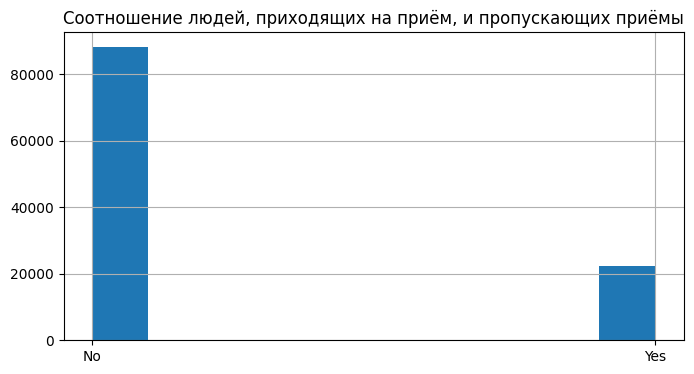

In [12]:
plt.figure(figsize=(8, 4))
df['No-show'].hist()
plt.title('Соотношение людей, приходящих на приём, и пропускающих приёмы');

In [13]:
df['No-show'].value_counts(normalize=True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

In [15]:
df[df['No-show'] == 'Yes']['Gender'].value_counts(normalize=True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

In [19]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns=categorical_columns_names)
encoded_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 95 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   PatientId                                  110527 non-null  float64
 1   AppointmentID                              110527 non-null  int64  
 2   ScheduledDay                               110527 non-null  object 
 3   AppointmentDay                             110527 non-null  object 
 4   Age                                        110527 non-null  int64  
 5   Scholarship                                110527 non-null  int64  
 6   Hipertension                               110527 non-null  int64  
 7   Diabetes                                   110527 non-null  int64  
 8   Alcoholism                                 110527 non-null  int64  
 9   Handcap                                    110527 non-null  int64  
 10  SMS_rece

## Логирование экспериментов ##

In [21]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


### Сброс настроек логирования ###

In [26]:
from importlib import reload
reload(logging)
logging.basicConfig(level=logging.DEBUG)

In [27]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [28]:
reload(logging)
logging.basicConfig(
    format='%(levelname)s: %(asctime)s: %(message)s',
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2023-02-06 20:20:22,462: Check


## Логирование информации о данных ##

In [32]:
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
    ''' Создает лог-файл для логирования в него
    Arguments:
        path [str] -- путь к директории
        file [str] -- имя файла
    Returns:
        [obj] -- Logger
    '''
    # проверяем, существует ли файл
    log_file = os.path.join(path, file)
    if not os.path.isfile(log_file):
        open(log_file, 'w+').close()

    # поменяем формат логирования
    file_logging_format = '%(levelname)s: %(asctime)s: %(message)s'

    # конфигурируем лог-файл
    logging.basicConfig(level=logging.INFO, format=file_logging_format)
    logger = logging.getLogger()

    # создадим хэнлдер для записи лога в файл
    handler = logging.FileHandler(log_file)

    # установим уровень логирования
    handler.setLevel(logging.INFO)

    # создадим формат логирования, используя file_logging_format
    formatter = logging.Formatter(file_logging_format)
    handler.setFormatter(formatter)

    # добавим хэндлер лог-файлу
    logger.addHandler(handler)

    return logger

In [33]:
# создаем папку для логирования
# !mkdir logs

In [34]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

In [36]:
logger.info('Data')

INFO: 2023-02-06 20:46:26,040: Data


In [37]:
logger.info('Data shape {}'.format(df.shape))

INFO: 2023-02-06 20:46:41,575: Data shape (110527, 14)


In [38]:
logger.info('Percentage of women: {}'.format(df[df['No-show'] == 'Yes']['Gender'].value_counts(True)[0]))

INFO: 2023-02-06 20:47:14,433: Percentage of women: 0.653882342398853


In [39]:
logger.info('Percentage of men: {}'.format(df[df['No-show'] == 'Yes']['Gender'].value_counts(True)[1]))

INFO: 2023-02-06 20:47:48,025: Percentage of men: 0.346117657601147


In [40]:
if df.shape != (110526, 14):
    logger.error('Data shape is incorrect!')

ERROR: 2023-02-06 20:49:02,981: Data shape is incorrect!
